In [61]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plot # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

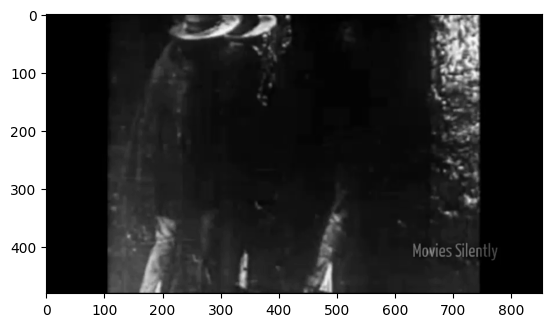

In [62]:
frame_number = 48
#Create video capture from fie, read specific frame 
cap = cv2.VideoCapture("../Films/Zorro.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, I = cap.read()
cap.release()
# Show image in line
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plot.imshow(G, cmap='gray') 
plot.show() 

(480, 854)


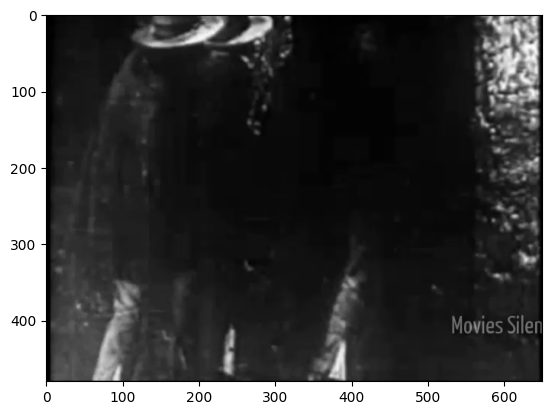

In [63]:
C = G[0:480,100:750]
print(G.shape)
plot.imshow(C, cmap='gray') 
plot.show()

(array([2.1640e+03, 9.2200e+02, 1.3260e+03, 1.0080e+04, 3.5250e+03,
        3.5810e+03, 3.8170e+03, 0.0000e+00, 1.5412e+04, 1.8193e+04,
        1.7302e+04, 8.7570e+03, 6.7890e+03, 6.1740e+03, 0.0000e+00,
        8.8320e+03, 1.0283e+04, 1.3694e+04, 7.7780e+03, 5.8820e+03,
        5.4760e+03, 0.0000e+00, 6.5830e+03, 7.5220e+03, 8.9020e+03,
        6.3310e+03, 5.2010e+03, 4.5320e+03, 4.3000e+01, 4.8390e+03,
        5.5830e+03, 6.4560e+03, 6.7320e+03, 5.3130e+03, 4.3680e+03,
        1.5800e+02, 4.3370e+03, 4.5780e+03, 4.5150e+03, 3.9760e+03,
        3.0400e+03, 2.5740e+03, 1.7000e+01, 2.5180e+03, 2.7120e+03,
        2.9670e+03, 2.6740e+03, 2.3120e+03, 2.0400e+03, 1.9000e+01,
        1.7810e+03, 1.7020e+03, 1.5640e+03, 1.4530e+03, 1.3030e+03,
        1.0980e+03, 2.3000e+01, 1.0630e+03, 1.0900e+03, 1.0570e+03,
        1.0410e+03, 9.4200e+02, 8.8500e+02, 3.0000e+00, 8.6500e+02,
        8.1700e+02, 8.6600e+02, 9.9500e+02, 8.1300e+02, 7.4500e+02,
        1.1000e+01, 7.3900e+02, 8.3800e+02, 8.31

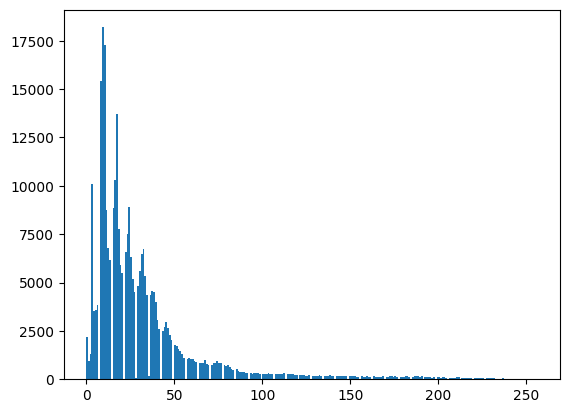

In [64]:
Values = C.ravel()
plot.hist(Values,bins=256,range=[0,256])

(array([ 2164.,   922.,  1326.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 10080.,     0.,     0.,  3525.,     0.,     0.,
         3581.,     0.,     0.,  3817.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        15412.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 18193.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 17302.,     0.,     0.,
            0.,     0.,     0.,     0.,  8757.,     0.,     0.,     0.,
            0.,     0.,  6789.,     0.,     0.,     0.,     0.,  6174.,
            0.,     0.,     0.,     0.,     0.,     0.,  8832.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 10283.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 13694.,     0.,     0.,     0.,     0., 

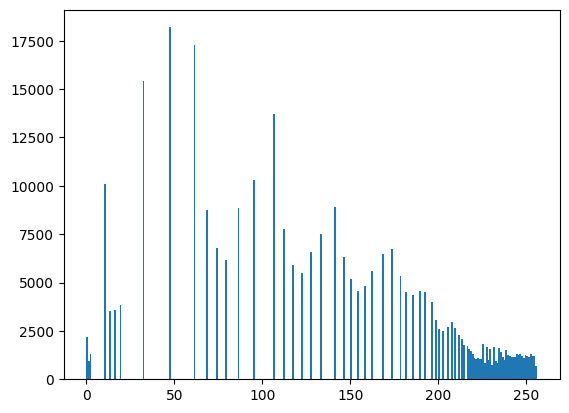

In [65]:
H = cv2.equalizeHist(C)
Values = H.ravel()
plot.hist(Values,bins=256,range=[0,256])

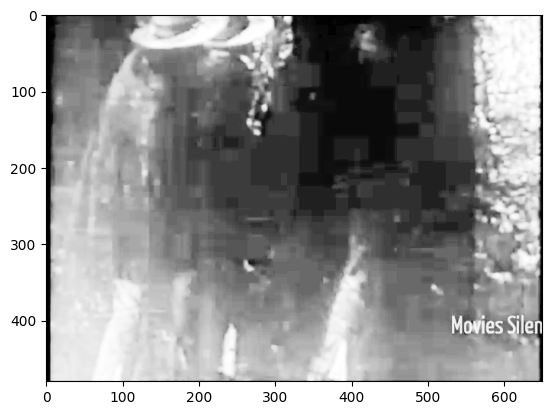

In [66]:
plot.imshow(H, cmap='gray') 
plot.show() 

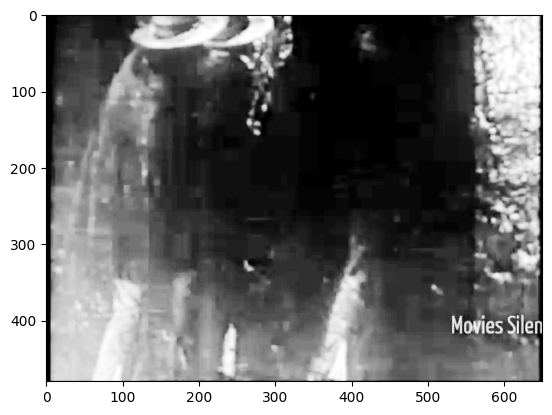

In [67]:
gamma = 1.9
Y = pow(H,gamma)
Y = (np.amax(H)/np.amax(Y) * Y).astype(np.uint8) 
plot.imshow(Y, cmap='gray') 
plot.show() 

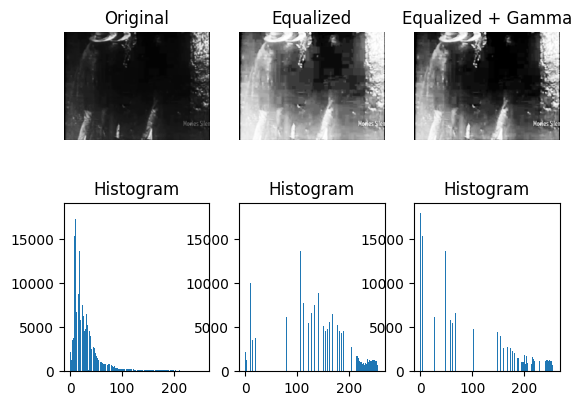

In [68]:
fig, axs = plot.subplots(2, 3)
axs[0,0].set_title('Original')
axs[0,1].set_title('Equalized')
axs[0,2].set_title('Equalized + Gamma')
axs[1,0].set_title('Histogram')
axs[1,1].set_title('Histogram')
axs[1,2].set_title('Histogram')
axs[0,0].imshow(C, cmap='gray')
axs[0,1].imshow(H, cmap='gray')
axs[0,2].imshow(Y, cmap='gray')
Values = C.ravel()
axs[1,0].hist(Values,bins=256,range=[0,256])
Values = H.ravel()
axs[1,1].hist(Values,bins=256,range=[0,256])
Values = Y.ravel()
axs[1,2].hist(Values,bins=256,range=[0,256])
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,2].axis("off")
#plot.show() 
plot.savefig("Output/histo_comparison.png", dpi=500)